In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv(r'Dataset\water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### About dataset columns

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0



Objective: The main objective of this dataset is to assess and predict water potability based on water quality attributes. It can be used for evaluating the safety and suitability of water sources for human consumption, making informed decisions about water treatment, and ensuring compliance with water quality standards.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


* total no of rows 3276 and columns 10
* ph has 2785 not null values remaining 3276
* sulfate has 2495 not null values
* Trihalomethanes has 3114 not null values

In [33]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [34]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [35]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [36]:
df.isna().sum()/len(df)*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

* ph contains almost 14% data missing
* Sulfate contains almost 23% 
* Trihalomethanes contains almost 4% data missing

<Axes: >

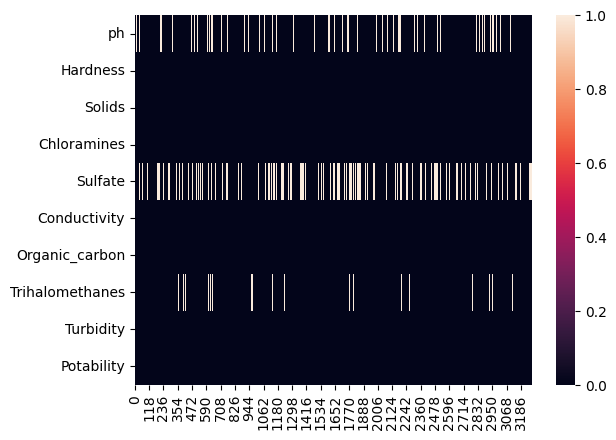

In [37]:
sns.heatmap(df.isna().T)

In [38]:
# checking for duplicate values
df.duplicated().sum()

0

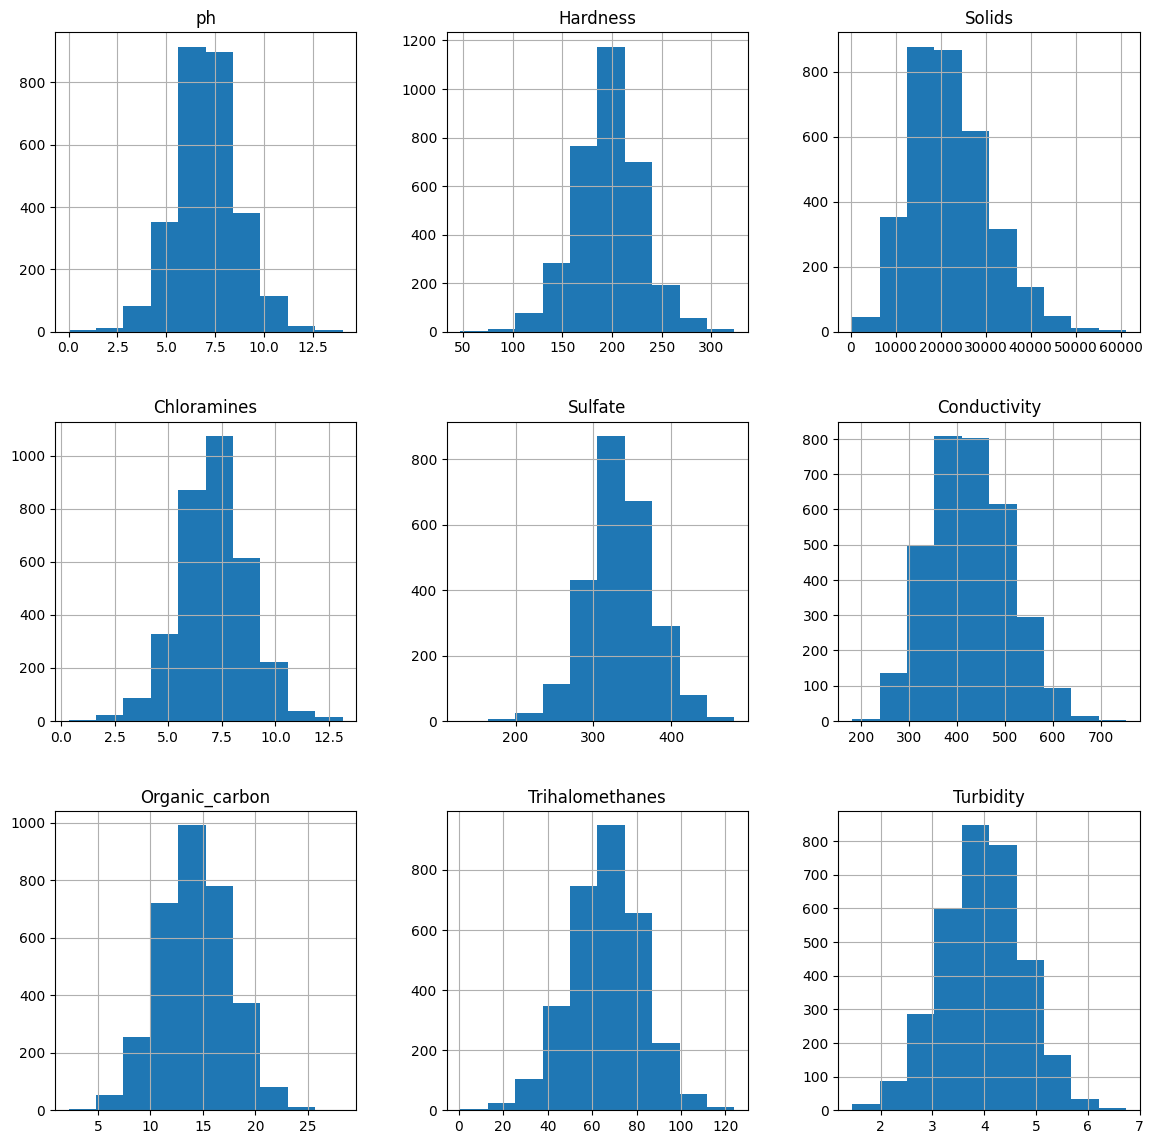

In [39]:
num_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon',
          'Trihalomethanes', 'Turbidity']

df[num_cols].hist(figsize=(14,14))
plt.show()

In [40]:
# The mean of numerical variables grouped by attrition
df.groupby(['Potability'])[num_cols].mean()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328


<Axes: >

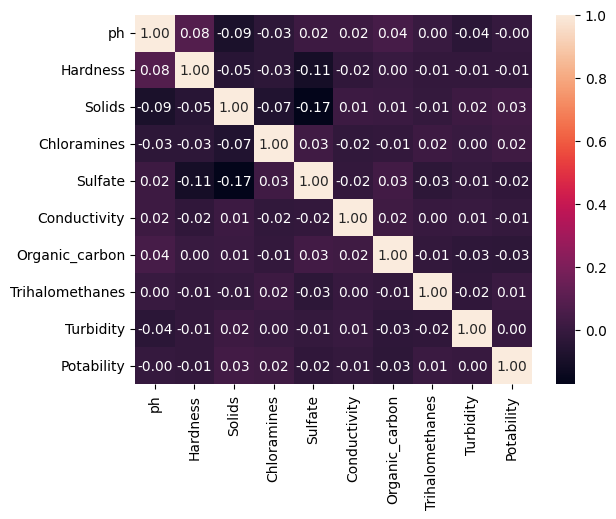

In [41]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [42]:
# only extract the null values columns
null_columns = df.columns[df.isnull().any()]

# filter columns with Null values
columns_with_null = df[null_columns]
columns_with_null

,ph,Sulfate,Trihalomethanes
0,NaN,368.516441,86.990970
1,3.716080,NaN,56.329076
2,8.099124,NaN,66.420093
3,8.316766,356.886136,100.341674
4,9.092223,310.135738,31.997993
...,...,...,...
3271,4.668102,359.948574,66.687695
3272,7.808856,NaN,NaN
3273,9.419510,NaN,69.845400
3274,5.126763,NaN,77.488213


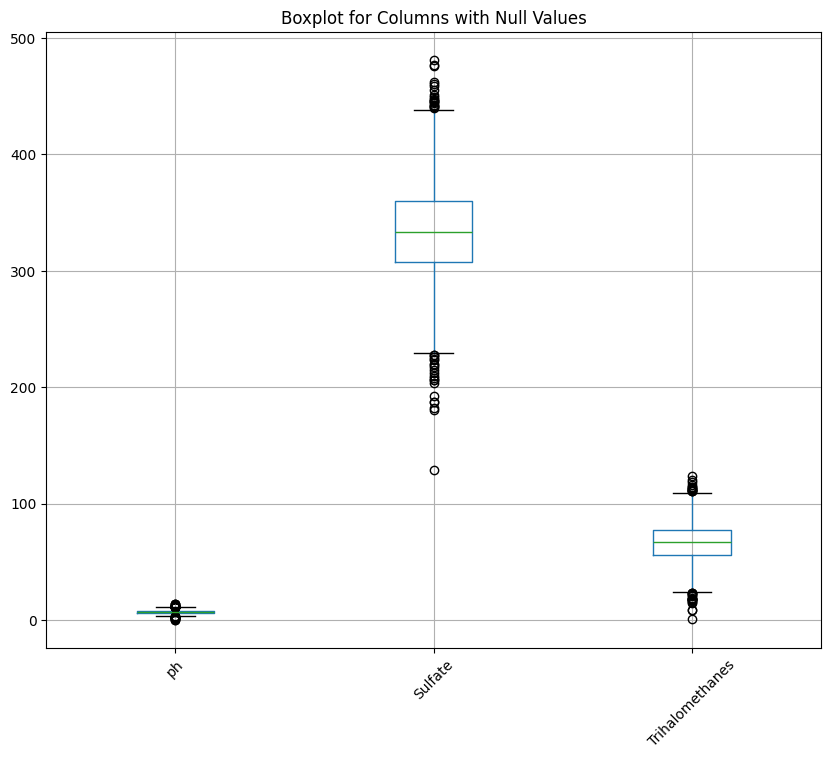

In [43]:
plt.figure(figsize=(10,8))
columns_with_null.boxplot()
plt.title('Boxplot for Columns with Null Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* Our dataset columns has an much missing values.

In maximum time we use the two commom technique  to impute the missing values mean and median. However

  * mean is sensitive to outliers as compare to median so we use the median to fill the missing values.

In [44]:
# Input the missing values with the median 
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)


In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<Axes: >

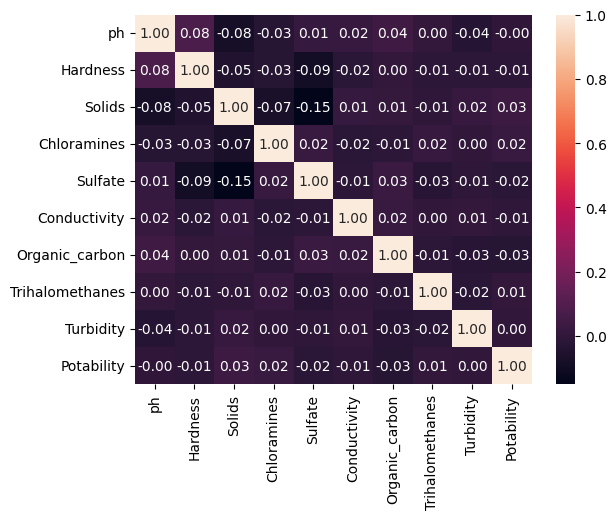

In [46]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [47]:
p = df['Potability'].value_counts()
p

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

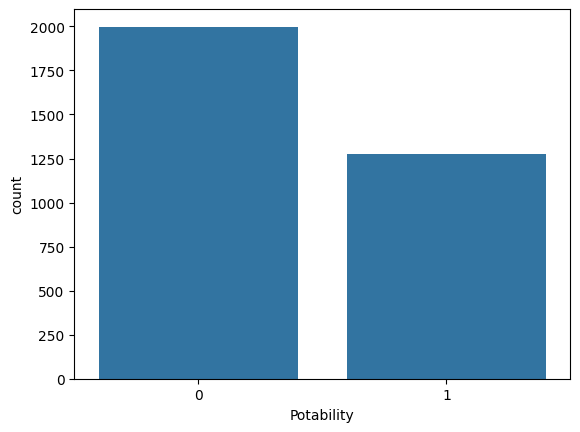

In [48]:
sns.countplot(x ='Potability',data=df)

* In Target column has an imbalanced data :

   0 -> 1998
   1 -> 1278

([<matplotlib.patches.Wedge at 0x2285d906f50>,
 [Text(-0.3722543665175176, 1.0350974285586076, '0'),
  Text(0.3722543665175174, -1.0350974285586076, '1')],
 [Text(-0.2030478362822823, 0.5645985973956041, '60.99%'),
  Text(0.2030478362822822, -0.5645985973956041, '39.01%')])

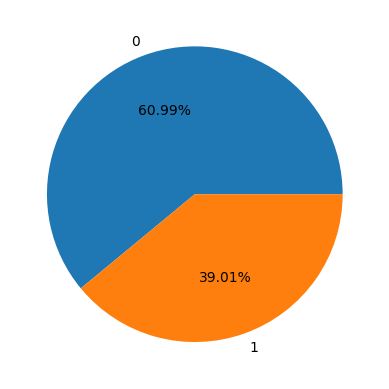

In [49]:
plt.pie(x=p.values,labels=p.index,autopct='%.2f%%')

* If Dependent (y) has an imbalance values in categorical data we cann't predict a model.

So, firstly we need to balanced the data. Some method are included to balanced the data but current situation we use the SMOTE(Synthetic Minority Over-sampling Technique) Technique only train data.


### Feature Engineering

In [50]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [51]:
X = df.drop(columns=['Potability'])
y = df.Potability

In [52]:
# We need to Scaling the data because without scale our model only predict one outcomes. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [54]:
from imbalanced.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Apply smote to the training data only
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

ModuleNotFoundError: No module named 'imbalanced'

In [ ]:
## LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [ ]:
## Support Vector machine
from sklearn.svm import SVC
svm_model = SVC(random_state=1)
svm_model.fit(X_train,y_train)

SVC(random_state=1)

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

### Evaluation of matrix

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,ConfusionMatrixDisplay
predictions = {
    'Logistic Regression' : y_pred_lr,
    'Support Vector Machine' : y_pred_svm
}

# Initialize an empty dictionary to store performance metrics
performance_metrics = {}

# Calculate performance metrics for each model and store them in the dictionary
for model_name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    performance_metrics[model_name] = [accuracy,precision,recall,f1]
    
    
# Create a Dataframe from the performance metrics dictionary
performance_df = pd.DataFrame(performance_metrics,index=['Accuracy','Precision','Recal','F1 Score']) 

print(performance_df)

           Logistic Regression  Support Vector Machine
Accuracy              0.595117                0.665310
Precision             0.000000                0.716981
Recal                 0.000000                0.286432
F1 Score              0.000000                0.409336


C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


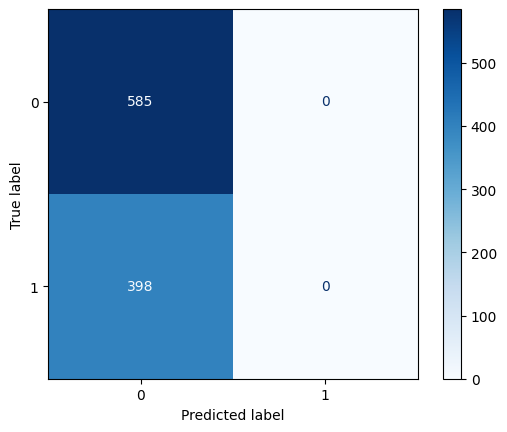

In [ ]:
# confusion metrix of logistic regression
ConfusionMatrixDisplay.from_estimator(lr_model,X_test,y_test,cmap='Blues')

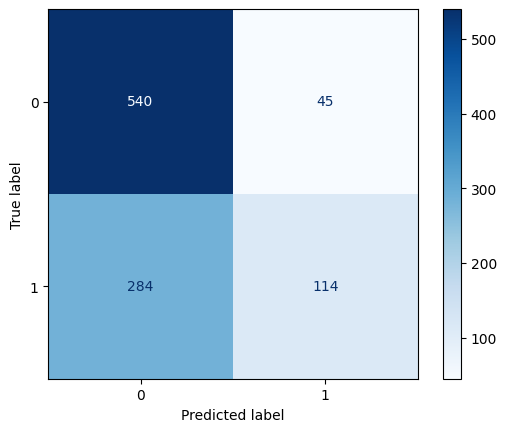

In [ ]:
# confusionmatrix of support vector machine
ConfusionMatrixDisplay.from_estimator(svm_model,X_test,y_test,cmap='Blues')
